# STC Lab 5B : Cyber Security using Machine Learning
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Roll No. : 36<br>
Date : 14-09-2020

In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
import time
import scipy as sp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from pandas_profiling import ProfileReport
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold

In [3]:
#Reading the dataset from the csv file
data = pd.read_csv(r'.\NSL_KDD\KDDTrain+.csv')

data.columns = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","counts","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

columns = data.columns

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
#Shape of the dataset
data.shape

(125972, 43)

In [5]:
#Number of outcomes by label
data.groupby(data.label)["label"].count()

label
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67342
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: label, dtype: int64

C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

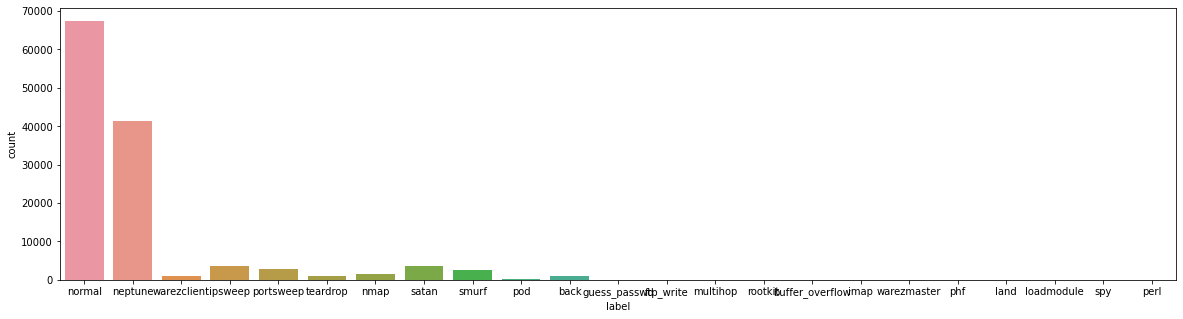

In [6]:
#plotting the data
plt.figure(figsize = (20,5))
sns.countplot(data.label)

In [7]:
#Sumamry of the dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
#Data Pre-Processing
#Mapping the different types of attacks to their respective categories
data = data.replace(to_replace = ["ipsweep","portsweep","nmap","satan"],value = "probe")
data = data.replace(to_replace = ["ftp_write", "guess_passwd","imap","multihop","phf","spy", "warezclient","warezmaster"],value = "r2l")
data = data.replace(to_replace = ["buffer_overflow","loadmodule","perl", "rootkit"],value = "u2r")
data = data.replace(to_replace = ["back", "land" ,"neptune", "pod","smurf","teardrop"], value = "dos")

C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

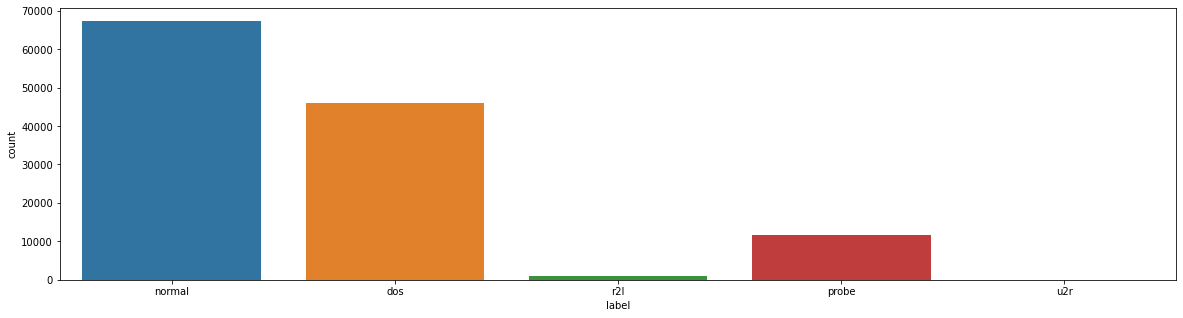

In [9]:
#plotting the data after processing
plt.figure(figsize = (20,5))
sns.countplot(data.label)

In [10]:
#Data Preprocessing : Label Encoding to convert strings to integers
data.protocol_type =preprocessing.LabelEncoder().fit_transform(data["protocol_type"])
data.service = preprocessing.LabelEncoder().fit_transform(data["service"])
data.flag = preprocessing.LabelEncoder().fit_transform(data["flag"])
data.label = preprocessing.LabelEncoder().fit_transform(data["label"])

In [11]:
#Pandas Profiling Report : Exploratory data analysis
profile = ProfileReport(data)

In [11]:
#Profile output to html file
profile.to_file('output.html')

In [12]:
#Splitting the dataset into features and target
cols = set(data.columns)
cols.remove('label')
X = data[cols]
y = data.iloc[:,-2]

In [13]:
#Updated data types of the dataset
data.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
counts                           int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
#Splitting the datasets into train and test datasets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.2)

In [15]:
#K-fold cross validation of the dataset using Random forest classifier
#We use k-fold cross validation to check splitting ratio : Split into k folds and use each fold as test and others
#as train and evaluate each split set and select the best combination

clf = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(clf, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [16]:
#Fitting the data to create the model
st = time.time() #To measure the time taken to train the model
#Training the model
clf.fit(X_train,y_train)
et = time.time()
print("Training time : {:.3f} s".format(et-st))
score = clf.score(X_test,y_test)
print("Model Score : {:.3f} %".format(score*100))

Training time : 0.775 s
Model Score : 99.889 %


In [ ]:
#Leave one out cross validation
loo = LeaveOneOut()
loo.get_n_splits(X)
X  = np.array(X)
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print("Model Score : {:.3f} %".format(score*100))

In [20]:
#RepeatedKFold Cross validation
seed = 7
kfold = RepeatedKFold(n_splits = 10, random_state = seed)
scores = cross_val_score(clf, X, y, cv = kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [17]:
#Ensemble of different algorithms to choose the best output
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators = 100)

dtc.fit(X_train, y_train)
lr.fit(X_train, y_train)
clf.fit(X_train, y_train)

print("Model Scores : ")
print("Logistic Regression Classifier : {:.3f} %".format(lr.score(X_test,y_test)*100))
print("Decision Tree Classifier : {:.3f} %".format(dtc.score(X_test,y_test)*100))
print("Random Forest Classifier : {:.3f} %".format(clf.score(X_test,y_test)*100))

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Scores : 
Logistic Regression Classifier : 85.092 %
Decision Tree Classifier : 99.817 %
Random Forest Classifier : 99.929 %


In [18]:
#We can thus see tha Random Forest Classifier has the highest accuracy rate. We thus choose it and continue with 
#the prediction and find the confusion matrix and other metrics.
#Validation model : Random Forest Classifier

y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = ["value"])
y_test = pd.DataFrame(y_test)

#Classification report
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9151
           1       1.00      1.00      1.00     13518
           2       1.00      1.00      1.00      2327
           3       0.99      0.97      0.98       191
           4       0.73      1.00      0.84         8

   micro avg       1.00      1.00      1.00     25195
   macro avg       0.94      0.99      0.96     25195
weighted avg       1.00      1.00      1.00     25195



In [19]:
#Confusion matrix
confusion_matrix(y_pred,y_test)

array([[ 9149,     2,     0,     0,     0],
       [    1, 13511,     4,     1,     1],
       [    0,     3,  2324,     0,     0],
       [    0,     3,     1,   185,     2],
       [    0,     0,     0,     0,     8]], dtype=int64)

In [22]:
#Creating the final model
clf = RandomForestClassifier()
clf.fit(X,y)

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
#Saving the model using pickle
outfile = open('model','wb')
saved_model = pickle.dumps(clf)
pickle.dump(clf,outfile) #Saving the model to a file
outfile.close()

In [21]:
#Using the saved model to predict data
r_model = pickle.loads(saved_model)
y_pred = r_model.predict(X_test)

#Classification report for retrieved model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9151
           1       1.00      1.00      1.00     13518
           2       1.00      1.00      1.00      2327
           3       0.99      0.97      0.98       191
           4       0.73      1.00      0.84         8

   micro avg       1.00      1.00      1.00     25195
   macro avg       0.94      0.99      0.96     25195
weighted avg       1.00      1.00      1.00     25195



<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">
<strong>Conclusion : </strong>
<br/>
From the experiment conducted, it can be concluded that Machine Learning can be used to determine what kind of attack is being executed based on various networking parameters such as protocol, flag, count etc. and thus is an effective tool in Cyber Security. Various classification models have been used and the most suited for this application is Decision Tree Classifier. Spot checking, Algorithm Tuning and ensemble techniques have been used to improve the accuracy of the model which has been saved for later use.

</div>